In [2]:
from messis.messis import Messis
from safetensors import safe_open
from transformers import PretrainedConfig
import torch

## Model Visualizations

This notebook serves the purpose of creating model visualizations.

### Load Messis from Huggingface 🤗

In [ ]:
config = PretrainedConfig.from_pretrained('crop-classification/messis')
model = Messis.from_pretrained('crop-classification/messis', cache_dir='../hf_cache/')

### Model Architecture Details

```python
Messis(
  (model): HierarchicalClassifier(
    (prithvi): TemporalViTEncoder(
      (patch_embed): PatchEmbed(
        (proj): Conv3d(6, 768, kernel_size=(1, 16, 16), stride=(1, 16, 16))
        (norm): Identity()
      )
      (blocks): ModuleList(
        (0-11): 12 x Block(
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (act): GELU(approximate='none')
            (drop1): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (ls2): Identity()
          (drop_path2): Identity()
        )
      )
      (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (neck): ConvTransformerTokensToEmbeddingNeck(
      (fpn1): Sequential(
        (0): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
        (1): Norm2d(
          (ln): LayerNorm((2304,), eps=1e-06, elementwise_affine=True)
        )
        (2): GELU(approximate='none')
        (3): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
      )
      (fpn2): Sequential(
        (0): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
        (1): Norm2d(
          (ln): LayerNorm((2304,), eps=1e-06, elementwise_affine=True)
        )
        (2): GELU(approximate='none')
        (3): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
      )
    )
    (heads): ModuleDict(
      (tier1): HierarchicalFCNHead(
        (convs): Sequential(
          (0): ConvModule(
            (conv): Conv2d(2304, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
          )
        )
        (conv_seg): Conv2d(256, 6, kernel_size=(1, 1), stride=(1, 1))
        (dropout): Dropout2d(p=0.1, inplace=False)
      )
      (tier2): HierarchicalFCNHead(
        (convs): Sequential(
          (0): ConvModule(
            (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
          )
        )
        (conv_seg): Conv2d(256, 17, kernel_size=(1, 1), stride=(1, 1))
        (dropout): Dropout2d(p=0.1, inplace=False)
      )
      (tier3): HierarchicalFCNHead(
        (convs): Sequential(
          (0): ConvModule(
            (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
          )
        )
        (conv_seg): Conv2d(256, 49, kernel_size=(1, 1), stride=(1, 1))
        (dropout): Dropout2d(p=0.1, inplace=False)
      )
    )
    (refinement_head): LabelRefinementHead(
      (cnn_layers): Sequential(
        (0): Conv2d(72, 128, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Dropout(p=0.5, inplace=False)
        (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 49, kernel_size=(1, 1), stride=(1, 1))
        (11): Dropout(p=0.5, inplace=False)
      )
    )
    (loss_func): CrossEntropyLoss()
  )
)
```

In [3]:
model

Messis(
  (model): HierarchicalClassifier(
    (prithvi): TemporalViTEncoder(
      (patch_embed): PatchEmbed(
        (proj): Conv3d(6, 768, kernel_size=(1, 16, 16), stride=(1, 16, 16))
        (norm): Identity()
      )
      (blocks): ModuleList(
        (0-11): 12 x Block(
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (act): GELU(approximate='none')
           

In [8]:
# TODO: Implement inference

In [10]:
# model param info
backbone = model.model.prithvi
neck = model.model.neck
decode_head = model.model.heads
auxiliary_head = model.model.refinement_head

def count_parameters(model_part):
    total_params = sum(p.numel() for p in model_part.parameters())
    trainable_params = sum(p.numel() for p in model_part.parameters() if p.requires_grad)
    return total_params, trainable_params

backbone_params, backbone_trainable = count_parameters(backbone)
neck_params, neck_trainable = count_parameters(neck)
decode_head_params, decode_head_trainable = count_parameters(decode_head)
auxiliary_head_params, auxiliary_head_trainable = count_parameters(auxiliary_head)

print(f"Backbone Total/Trainable Parameters: {backbone_params:,}/{backbone_trainable:,}")
print(f"Neck Total/Trainable Parameters: {neck_params:,}/{neck_trainable:,}")
print(f"HierarchicalFCNHead Total/Trainable Parameters: {decode_head_params:,}/{decode_head_trainable:,}")
print(f"RefinementHead Total/Trainable Parameters: {auxiliary_head_params:,}/{auxiliary_head_trainable:,}")

Backbone Total/Trainable Parameters: 86,689,536/0
Neck Total/Trainable Parameters: 84,953,088/84,953,088
HierarchicalFCNHead Total/Trainable Parameters: 6,508,104/6,508,104
RefinementHead Total/Trainable Parameters: 311,601/311,601


## Model Visualization

### High-Level Overview

Drawing graph with depth 1 and input size (1, 6, 3, 224, 224)
Drawing graph with depth 2 and input size (1, 6, 3, 224, 224)


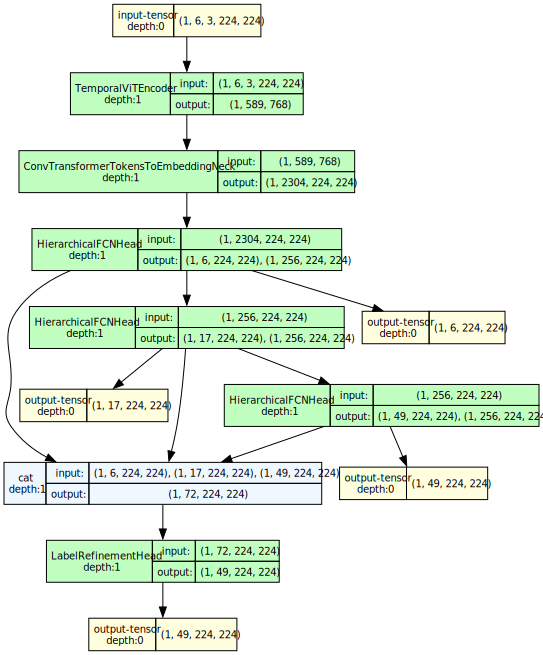

In [57]:
from torchview import draw_graph
import re

def save_graph(graph, filename):
    graph_svg = graph.visual_graph.pipe(format='svg') #.decode('utf-8') # convert to binary data

    # write to file
    with open('../assets/' + filename + '.svg', 'wb') as f:
        f.write(graph_svg)

def make_graph(model, depth=1, input_size=(1, 6, 3, 224, 224)):
    print(f"Drawing graph with depth {depth} and input size {input_size}")
    return draw_graph(model, graph_name='Messis', input_size=input_size, device='meta', depth=depth, show_shapes=True, expand_nested=True, graph_dir='TB', roll=True)

messis_architecture_d1 = make_graph(model.model, depth=1)
messis_architecture_d2 = make_graph(model.model, depth=2)

save_graph(messis_architecture_d1, 'messis_architecture_d1')
save_graph(messis_architecture_d2, 'messis_architecture_d2')

messis_architecture_d1.visual_graph

In [38]:
def manipulate_svg(svg_text):
    svg_text = re.sub(r'<text[^>]*>depth:\d+<\/text>', '', svg_text)
    # svg_text = re.sub(r'font-family="Linux libertine" font-size="10.00"', 'font-family="Helvetica" font-size="9.50"', svg_text)
    return svg_text

with open('../assets/messis_complete_high_level_edited.svg', 'w') as f:
    f.write(manipulate_svg(messis_architecture_d1.visual_graph.pipe(format='svg').decode('utf-8')))

### Backbone

Drawing graph with depth 1 and input size (1, 6, 3, 224, 224)


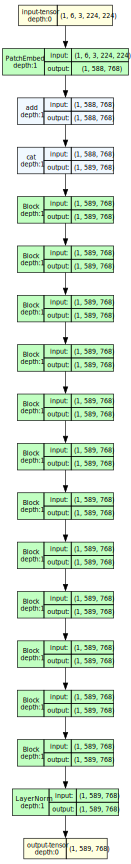

In [61]:
backbone_architecture = make_graph(model.model.prithvi, depth=1)
save_graph(backbone_architecture, 'backbone_architecture')
backbone_architecture.visual_graph

### Neck

Drawing graph with depth 2 and input size (1, 1, 589, 768)


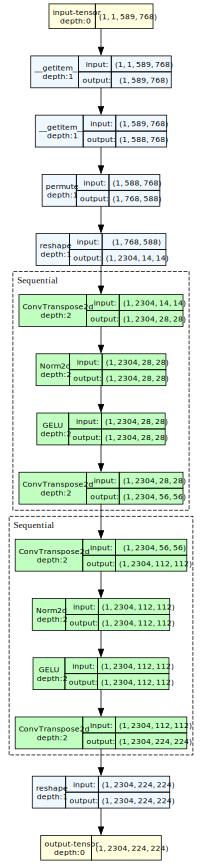

In [63]:
neck_architecture = make_graph(model.model.neck, depth=2, input_size=(1, 1, 589, 768))
save_graph(neck_architecture, 'neck_architecture')
neck_architecture.visual_graph